1.	**The names of team member(s)**:

    Xiangyu Zhang

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, numpy, seaborn, requests and beautifulsoup, matplotlib, os
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/zhan656/inf510_project and execute this notebook


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    THE crime data file are just a subset of the entire dataset since I di not have the Google API limit to convert them all and to get geoinformation, the subset I chose here is the most recent 5000 cases and later on some invalid rows were removed

4.  **Anything else you feel is relevant to the grading of your project your project.**

    No.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    The Purpose of this project id to find out if areas with high house price would have more recreational facilities around and with lower crime rate. I was hoping this could give some advice when people like me we looking for a new place to live and provide some advice. 

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    The conclusions are listed below each graph

7. **What difficulties did you have in completing the project?**  

    I was not able to convert all infomation to the geocode with Google API since free users only have limited trails
    Also Zillow website would black me if I scrape too much information.

8. **What skills did you wish you had while you were doing the project?**

    the web scrapping skill is still new to me, I took a lot of time to figure out how to read those complicated html page.


9. **What would you do “next” to expand or augment the project?**

    I would scrapped more data from zillow, and get a full list of geocode information with higher Google API capacity

In [1]:
import pandas as pd
import numpy as np
from pygeocoder import Geocoder

import matplotlib as mpl
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
import os

In [2]:
# the datasets scrapped from Zillow website are stored 5 four different csv files
# because everytime I was trying to scrapped to much, the website would detect me as "robot"
# so I had to scrapped them seperately and concatenate them together for further analysis

house_df_0 = pd.read_csv('../data/zillow.csv')
house_df_1 = pd.read_csv('../data/zillow_1.csv')
house_df_2 = pd.read_csv('../data/zillow_2.csv')
house_df_3 = pd.read_csv('../data/zillow_3.csv')
house_df_4 = pd.read_csv('../data/zillow_4.csv')

In [3]:
# create a new column that gives price per square feet of each house
house_df_0['price_sqft'] = house_df_0['price']/house_df_0['size']
house_df_1['price_sqft'] = house_df_1['price']/house_df_1['size']
house_df_2['price_sqft'] = house_df_2['price']/house_df_2['size']
house_df_3['price_sqft'] = house_df_3['price']/house_df_3['size']
house_df_4['price_sqft'] = house_df_4['price']/house_df_4['size']
house_df_4.head()

,Unnamed: 0,zipcode,address,price,size,price_sqft
0,0,90255,"7312 Roseberry Ave, Huntington Park, CA 90255",775000,2964,261.470985
1,1,90255,"7611 Seville Ave, Huntington Park, CA 90255",745000,3008,247.672872
2,2,90255,"2545 Grand Ave, Huntington Park, CA 90255",775000,2262,342.617153
3,3,90255,"2484 Cass Pl, Huntington Park, CA 90255",515000,1165,442.060086
4,4,90255,"3277 E Gage Ave, Huntington Park, CA 90255",299900,922,325.271150


In [4]:
new_df_0 = house_df_0.groupby('zipcode', as_index = False)['price_sqft'].median()
new_df_1 = house_df_1.groupby('zipcode', as_index = False)['price_sqft'].median()
new_df_2 = house_df_2.groupby('zipcode', as_index = False)['price_sqft'].median()
new_df_3 = house_df_3.groupby('zipcode', as_index = False)['price_sqft'].median()
new_df_4 = house_df_4.groupby('zipcode', as_index = False)['price_sqft'].median()
new_df_4.head()

,zipcode,price_sqft
0,90255,336.249317
1,90262,363.214760
2,90265,1322.201206
3,90266,1150.908456
4,90270,406.313883


In [5]:
# the result dataframe is median house price per square feet by zipcode in LA area
frames = [new_df_0, new_df_1, new_df_2, new_df_3, new_df_4]
result_df = pd.concat(frames, ignore_index = True)
result_df.head()

,zipcode,price_sqft
0,91001,574.909763
1,91006,538.909550
2,91007,597.804391
3,91010,390.625000
4,91011,738.785752


In [7]:
# now we load the crime data in LA area
crime_df = pd.read_csv('../data/crime_zip.csv')
crime_df.head()

,Unnamed: 0,dr_no,area,date_occ,time_occ,location,lat,lon,crm_cd,zipcode
0,0,190519119,5,2019-12-09T00:00:00.000,130,25100 FRAMPTON AV,33.7968,-118.2999,901,90710
1,1,190720594,7,2019-12-09T00:00:00.000,1055,1200 S LA BREA AV,34.0534,-118.3436,745,90019
2,2,191228459,12,2019-12-09T00:00:00.000,2350,4500 S VAN NESS AV,34.0028,-118.3171,230,90062
3,3,191824614,18,2019-12-09T00:00:00.000,1915,10100 GRANDEE AV,33.9397,-118.2438,230,90002
4,4,190920997,9,2019-12-09T00:00:00.000,700,14200 RIVERSIDE DR,34.1576,-118.4422,310,91423


In [8]:
# count number of crime cases by zipcode
crime_count_df = crime_df.groupby('zipcode', as_index = False)['dr_no'].count()
crime_count_df.head()

,zipcode,dr_no
0,90001,18
1,90002,43
2,90003,143
3,90004,70
4,90005,39


In [9]:
crime_vs_price_df = result_df.join(crime_count_df.set_index('zipcode'), on='zipcode').dropna()
crime_vs_price_df.head()

,zipcode,price_sqft,dr_no
9,91040,400.844567,9.0
10,91042,516.129032,11.0
31,91214,483.485194,4.0
34,91303,393.873085,40.0
35,91304,341.523096,34.0


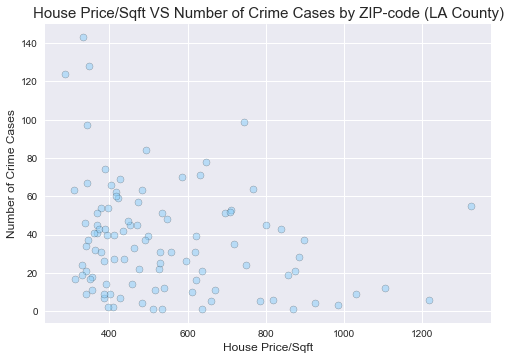

In [10]:

mpl.style.use('seaborn')
x = crime_vs_price_df['price_sqft']
y = crime_vs_price_df['dr_no']

# Plot
plt.scatter(x,y,c="lightskyblue", edgecolors="black",
            alpha=.5, marker = "o")
plt.title('House Price/Sqft VS Number of Crime Cases by ZIP-code (LA County)',fontsize=15)
plt.xlabel('House Price/Sqft', fontsize=12)
plt.ylabel('Number of Crime Cases', fontsize=12)
plt.grid(color="white")
plt.show()

Conclusion: <br/>
Each point here represent a zipcode.
From this map we cannot confirm the assumption that <br/>
areas with higher house price would have lower crime rate <br/>
especially for areas with house price at around $400/sqft, most of them do not have very high crime rate

In [11]:
crime_price = crime_df.join(result_df.set_index('zipcode'), on='zipcode').dropna()
serious_crime_price = crime_price[crime_price['crm_cd']<400]
serious_crime_price.head()

,Unnamed: 0,dr_no,area,date_occ,time_occ,location,lat,lon,crm_cd,zipcode,price_sqft
2,2,191228459,12,2019-12-09T00:00:00.000,2350,4500 S VAN NESS AV,34.0028,-118.3171,230,90062,390.179514
3,3,191824614,18,2019-12-09T00:00:00.000,1915,10100 GRANDEE AV,33.9397,-118.2438,230,90002,373.931624
4,4,190920997,9,2019-12-09T00:00:00.000,700,14200 RIVERSIDE DR,34.1576,-118.4422,310,91423,556.399865
7,7,190222985,2,2019-12-09T00:00:00.000,1030,N VERMONT AV,34.0888,-118.2917,230,90029,530.674923
15,16,190128822,1,2019-12-09T00:00:00.000,304,7TH ST,34.0445,-118.2523,350,90014,717.816092


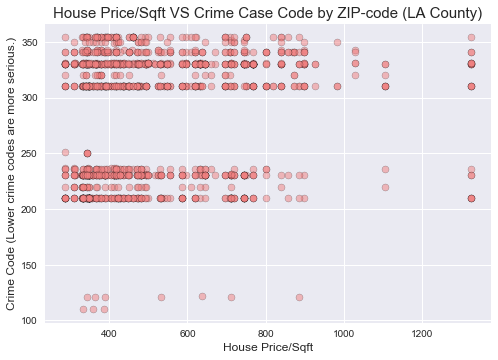

In [12]:
mpl.style.use('seaborn')
x = serious_crime_price['price_sqft']
y = serious_crime_price['crm_cd']

plt.scatter(x,y,c="lightcoral", edgecolors="black",
            alpha=.5, marker = "o")
plt.title('House Price/Sqft VS Crime Case Code by ZIP-code (LA County)',fontsize=15)
plt.xlabel('House Price/Sqft', fontsize=12)
plt.ylabel('Crime Code (Lower crime codes are more serious.)', fontsize=12)
plt.grid(color="white")
plt.show()

Conclusion: <br/>
Each point here represent one crime case with crime code lower than 400.<br/>
Which are considered as serious crime cases<br/>
From this map we clearly see the density of crime cases in lower price area is higher than <br/>
areas with high house price <br/>
especially for cases with code below 250, we can see significant crime decrease as house price being higher.

In [13]:
# now we load the recreational facilities data in LA area, and count the number of facilities by zipcode
faci_df = pd.read_csv('../data/creat_LA.csv')
faci_count_df = faci_df.groupby('zip', as_index = False)['location_name'].count()
faci_count_df.head()

,zip,location_name
0,90002,7
1,90003,14
2,90004,2
3,90006,7
4,90007,7


In [14]:
faci_vs_price_df_with_na = result_df.join(faci_count_df.set_index('zip'), on='zipcode').fillna(0)
faci_vs_price_df_with_na.head()

,zipcode,price_sqft,location_name
0,91001,574.909763,0.0
1,91006,538.909550,0.0
2,91007,597.804391,0.0
3,91010,390.625000,0.0
4,91011,738.785752,0.0


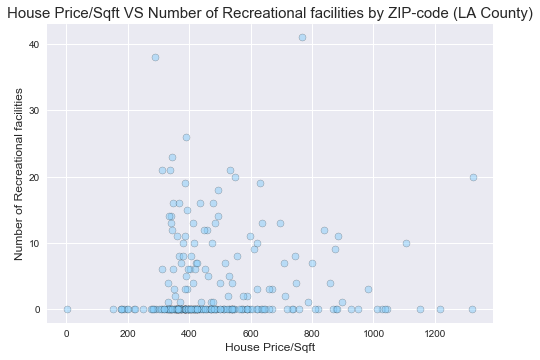

In [15]:
# Including zipcode with no record of recreational facility infomation
mpl.style.use('seaborn')
x = faci_vs_price_df_with_na['price_sqft']
y = faci_vs_price_df_with_na['location_name']

# Plot
plt.scatter(x,y,c="lightskyblue", edgecolors="black",
            alpha=.5, marker = "o")
plt.title('House Price/Sqft VS Number of Recreational facilities by ZIP-code (LA County)',fontsize=15)
plt.xlabel('House Price/Sqft', fontsize=12)
plt.ylabel('Number of Recreational facilities', fontsize=12)
plt.grid(color="white")
plt.show()

Conclusion: <br/>
The assuption is: areas withs higher house price would have more recreational facilities around that area <br/>
but what we see here is not completely supporting our assuption.<br/>
For zipcode with non zero facilities, we see just the opposite.<br/>
Areas with lower price actually had more facilities <br/>
But for those with zero facilties, we can see that most of them are having a low price